In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt   
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [64]:
df_merged = pd.read_csv("../Data/daily_weather_merged.csv")

In [65]:
df_merged = df_merged.drop(columns = ['energy_mean',
                                        'energy_max',   
                                        'energy_min',      
                                        'energy_std',     
                                        'energy_count'
                                     ])

In [66]:
df_merged.head()

,Unnamed: 0,day,LCLid,energy_sum,dayTime,visibility,temperatureMin,temperatureMax,icon,cloudCover,moonPhase
0,0,2011-11-23,MAC000149,2.287,8.52,8.06,3.81,10.36,fog,0.36,0.94
1,1,2011-11-23,MAC000154,5.798,8.52,8.06,3.81,10.36,fog,0.36,0.94
2,2,2011-11-23,MAC000156,6.523,8.52,8.06,3.81,10.36,fog,0.36,0.94
3,3,2011-11-23,MAC000150,9.254,8.52,8.06,3.81,10.36,fog,0.36,0.94
4,4,2011-11-23,MAC000147,3.036,8.52,8.06,3.81,10.36,fog,0.36,0.94


In [67]:
## df_merged['day'] = pd.to_datetime(df_merged['day']) - pd.to_timedelta(7, unit='d')
## df_merged.groupby([pd.Grouper(key='day', freq='W-MON')])
df_merged = (df_merged.groupby(['day'])
            .mean()
            .sort_values('day')
            .reset_index()
            .drop(columns = ['Unnamed: 0'])
            )

In [68]:
## Multiplying energy_sum by 7 (7 days in the week) to have the total energy consumption per week and not the average per day that week
## df_merged['energy_sum'] = df_merged['energy_sum'] * 7

In [69]:
df_merged

,day,energy_sum,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
0,2011-11-23,6.952692,8.520000,8.06,3.81,10.36,0.36,0.94
1,2011-11-24,8.536480,8.476111,10.64,8.56,12.93,0.41,0.97
2,2011-11-25,9.499781,8.433333,12.38,7.46,13.03,0.48,0.01
3,2011-11-26,10.267707,8.391944,13.07,7.01,12.96,0.44,0.05
4,2011-11-27,10.850805,8.351667,13.08,4.47,13.54,0.42,0.08
...,...,...,...,...,...,...,...,...
822,2014-02-24,10.411403,10.569444,13.00,7.99,14.23,0.50,0.82
823,2014-02-25,10.294997,10.634167,12.09,6.79,11.43,0.62,0.86
824,2014-02-26,10.202945,10.699167,13.00,4.17,11.29,0.26,0.90
825,2014-02-27,10.356350,10.763889,12.04,3.93,10.31,0.32,0.93


In [70]:
df_merged.corr()['energy_sum']

energy_sum        1.000000
dayTime          -0.768339
visibility       -0.245011
temperatureMin   -0.804079
temperatureMax   -0.843281
cloudCover        0.240353
moonPhase        -0.033909
Name: energy_sum, dtype: float64

In [71]:
x = df_merged[["temperatureMin"]]
y = df_merged[["energy_sum"]]

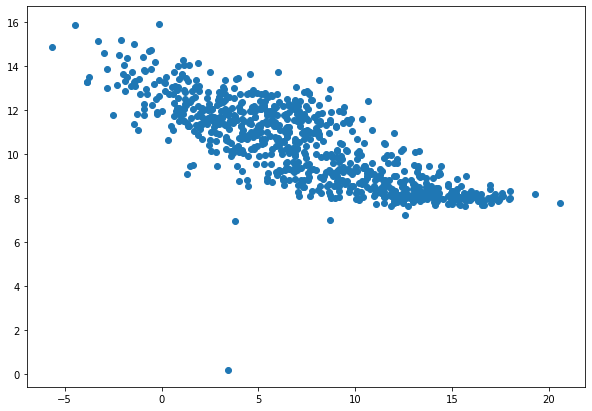

In [72]:
plt.figure(figsize=(10,7))
plt.scatter(x, y)

In [73]:
df_merged.loc[df_merged["energy_sum"] < 2]

,day,energy_sum,dayTime,visibility,temperatureMin,temperatureMax,cloudCover,moonPhase
826,2014-02-28,0.208997,10.829167,10.8,3.43,7.35,0.67,0.97


In [74]:
df_merged.drop(index = 826, inplace = True)

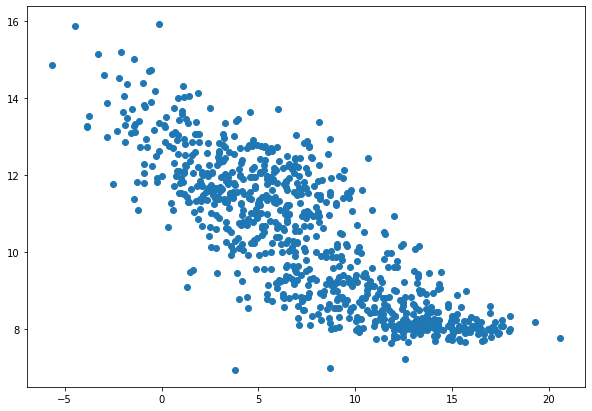

In [76]:
plt.figure(figsize=(10,7))
plt.scatter(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])

In [77]:
regressor = LinearRegression()
regressor.fit(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])

LinearRegression()

In [78]:
regressor.score(x, y)

0.6464541929516212

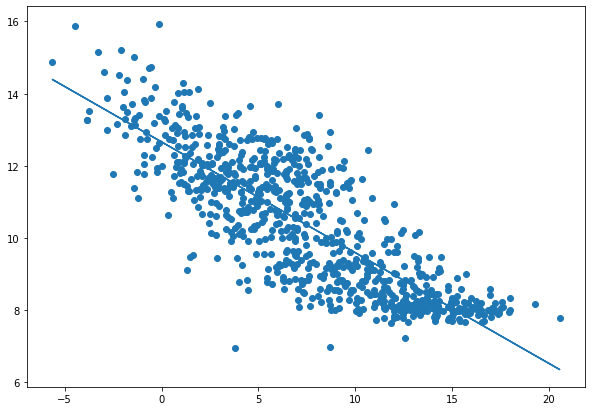

In [79]:
plt.figure(figsize=(10,7))
plt.scatter(df_merged[["temperatureMin"]], df_merged[["energy_sum"]])
plt.plot(df_merged[["temperatureMin"]], regressor.predict(df_merged[["temperatureMin"]]))

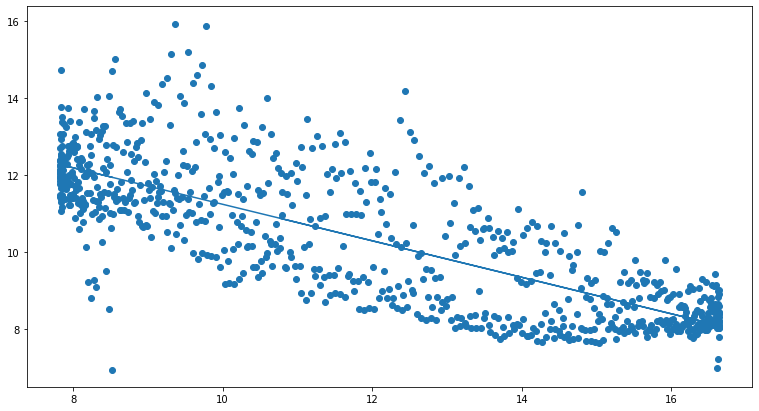

In [82]:
#X = df_merged[["dayTime"]]
#Y = df_merged[["energy_sum"]]
regressor = LinearRegression()
regressor.fit(df_merged[["dayTime"]], df_merged[["energy_sum"]])
plt.figure(figsize=(13,7))
plt.scatter(df_merged[["dayTime"]], df_merged[["energy_sum"]])
plt.plot(df_merged[["dayTime"]], regressor.predict(df_merged[["dayTime"]]))

In [83]:
regressor.score(X, Y)

0.5902925556686588

In [39]:
df_merged = sm.add_constant(df_merged)
df_merged_y = df_merged["energy_sum"]
df_merged_x = df_merged[['const','dayTime', 'temperatureMin']]
df_merged_ols = sm.OLS(df_merged_y, df_merged_x, missing = 'drop').fit()

In [41]:
df_merged_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             energy_sum   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1299.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          1.88e-255
Time:                        12:00:09   Log-Likelihood:                -1109.7
No. Observations:                 827   AIC:                             2225.
Df Residuals:                     824   BIC:                             2240.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.0150      0.135    111.536      0.000      14.751      15.279
dayTime           -0.2666      0.014    -19.629      0.000      -0.293      -0.240
temperatureMin    -0.2009      0.008    -24.033      0.000      -0.217      -0.185
==============================================================================
Omnibus:                      521.249   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24996.117
Skew:                          -2.184   Prob(JB):                         0.00
Kurtosis:                      29.577   Cond. No.                         62.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""